In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
train_df = pd.read_csv("train.csv")

/var/folders/v6/hwjhxff57kz0r3_zmmhctqk00000gn/T/ipykernel_8284/1105141585.py:1: DtypeWarning:

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


#### El dataset tiene 100000 filas y 28 columnas

In [4]:
train_df.shape

(100000, 28)

#### Datos Faltantes

In [5]:
nas = train_df.isna().sum().to_frame()
nas.columns = ["Número Datos Faltantes"]
nas

,Número Datos Faltantes
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [6]:
def prueba(x):
    try:
        int(x)
        return False
    except:
        return True

In [7]:
train_df.Age[train_df.Age.apply(prueba)].to_frame().T

,8,54,58,71,89,97,123,184,227,236,...,99845,99854,99883,99892,99899,99908,99922,99933,99942,99987
Age,28_,34_,30_,24_,33_,35_,30_,31_,40_,37_,...,23_,40_,31_,38_,33_,4808_,38_,38_,48_,28_


### EDA

In [8]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


## Revisión y limpieza variables númericas

#### Age
Podemos ver que los valores de la columna Age no tienen sentido. Hay valores que estan seguidos por un guion bajo (_), valores muy altos o negativos que no pueden ser edades.

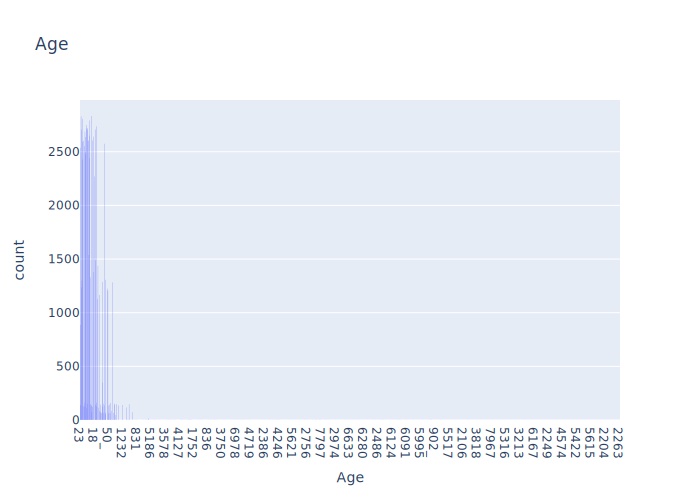

In [9]:
fig = px.histogram(train_df, x="Age",title = "Age")
fig.show()

#### Limpieza Age

In [10]:
def limpieza_age(x):
    try:
        return int(x)
    except:
        return int(x.replace("_",""))

In [11]:
train_df.Age = train_df.Age.apply(limpieza_age)
train_df = train_df[(train_df.Age >=0) & (train_df.Age <= 90)]

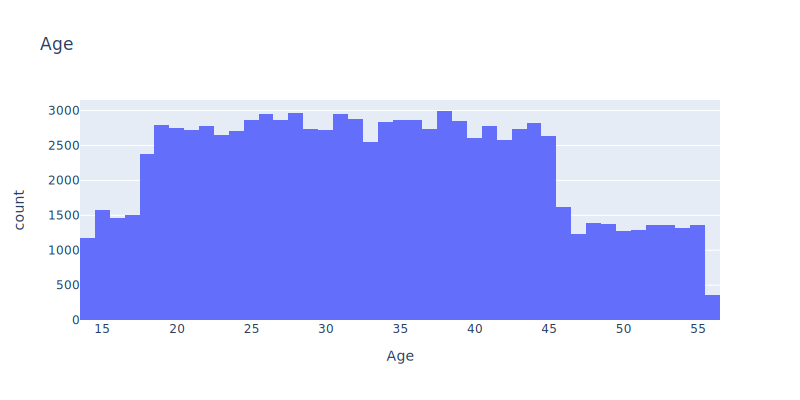

In [12]:
fig = px.histogram(train_df, x="Age",title = "Age",width=800, height=400)
fig.show()

## Las edades van desde los 14 hasta los 56 años. La mayoria de personas se encuentran entre los 20 y 40 años

In [13]:
train_df.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,97219.000000,82623.000000,97219.000000,97219.000000,97219.000000,97219.000000,95313.000000,97219.000000,97219.000000
mean,33.320009,4195.120334,17.128658,22.448421,72.596488,21.079449,27.854700,32.284863,1396.609097
std,10.769558,3182.962420,117.690107,128.851822,467.291781,14.858253,193.579136,5.117844,8280.095331
min,14.000000,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,24.000000,1626.594167,3.000000,4.000000,8.000000,10.000000,3.000000,28.052581,30.338701
50%,33.000000,3096.154167,6.000000,5.000000,13.000000,18.000000,6.000000,32.306482,69.272824
75%,42.000000,5957.715000,7.000000,7.000000,20.000000,28.000000,9.000000,36.499469,161.405543
max,56.000000,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


#### Num_Bank_Accounts
Podemos ver que los valores de la columna Num_Bank_Accounts no tienen sentido. Hay valores negativos, y valores muy grandes que no tienen sentido en el contexto de negocio.
Viendo que el percentil 75 es de 7 filtramos por un valor cercano

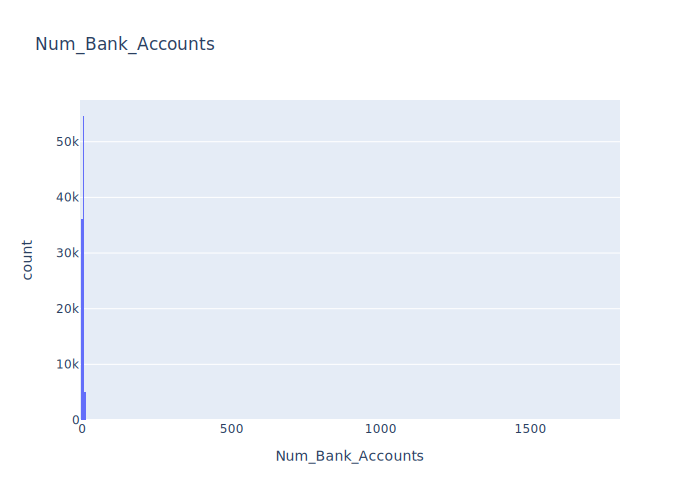

In [14]:
fig = px.histogram(train_df, x="Num_Bank_Accounts",title = "Num_Bank_Accounts")
fig.show()

In [15]:
train_df = train_df[(train_df.Num_Bank_Accounts >=0) & (train_df.Num_Bank_Accounts <= 10)]

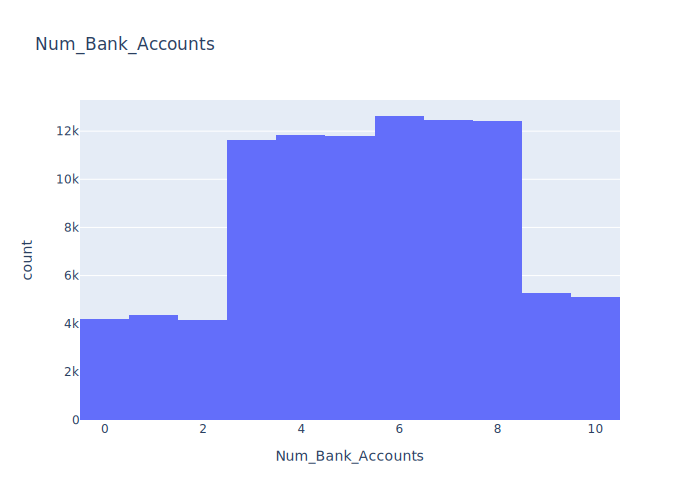

In [16]:
fig = px.histogram(train_df, x="Num_Bank_Accounts",title = "Num_Bank_Accounts")
fig.show()

### El número de cuentas bancarias va desde 0 hasta 10, la mayoria de personas tiene entre 3 y 8

#### Num_Credit_Card
Podemos ver que los valores de la columna Num_Credit_Card no tienen sentido. Hay valores muy grandes que no tienen sentido en el contexto de negocio.
Viendo que el percentil 75 es de 7 filtramos por un valor cercano

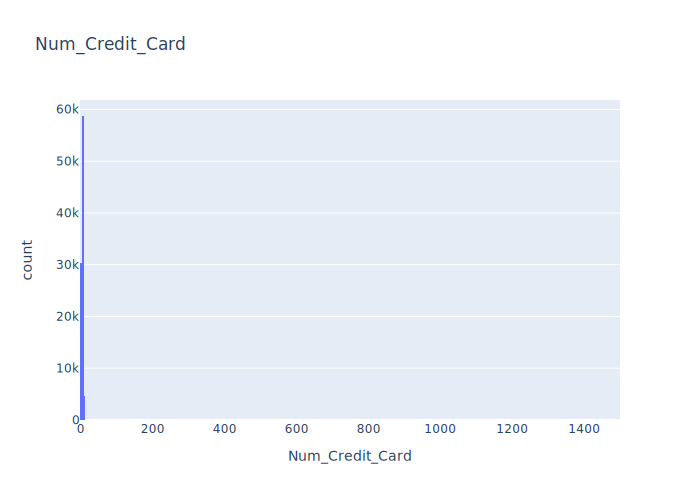

In [17]:
fig = px.histogram(train_df, x="Num_Credit_Card",title = "Num_Credit_Card")
fig.show()


In [18]:
train_df = train_df[(train_df.Num_Credit_Card >=0) & (train_df.Num_Credit_Card <= 10)]

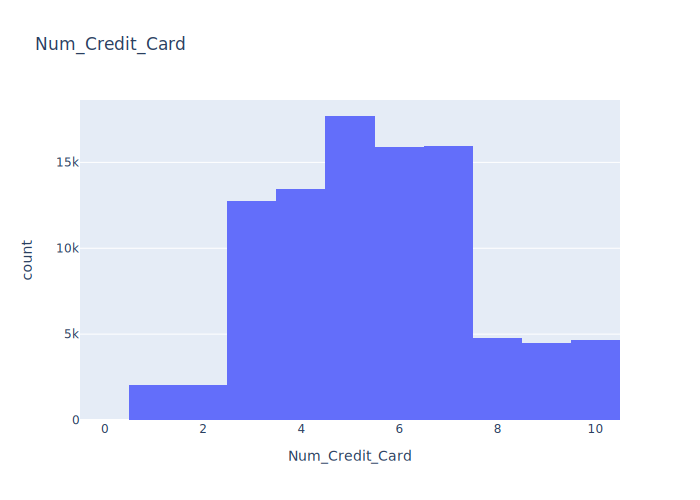

In [19]:
fig = px.histogram(train_df, x="Num_Credit_Card",title = "Num_Credit_Card")
fig.show()

### El número de tarjetas de credito va de 0 hasta 10, la mayoria de personas tienen entre 3 y 6 tarjetas

#### Interest_Rate	
Podemos ver que los valores de la columna Num_Bank_Accounts no tienen sentido. Hay valores muy grandes que no tienen sentido en el contexto de negocio.
Filtramos los datos para que el maximo de tasa de interes sea del 50%

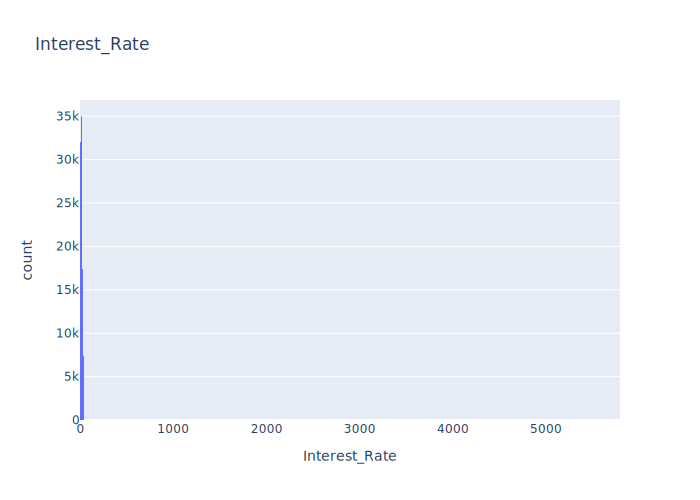

In [20]:
fig = px.histogram(train_df, x="Interest_Rate",title = "Interest_Rate")
fig.show()


In [21]:
train_df = train_df[(train_df.Interest_Rate >=0) & (train_df.Interest_Rate <= 50)]

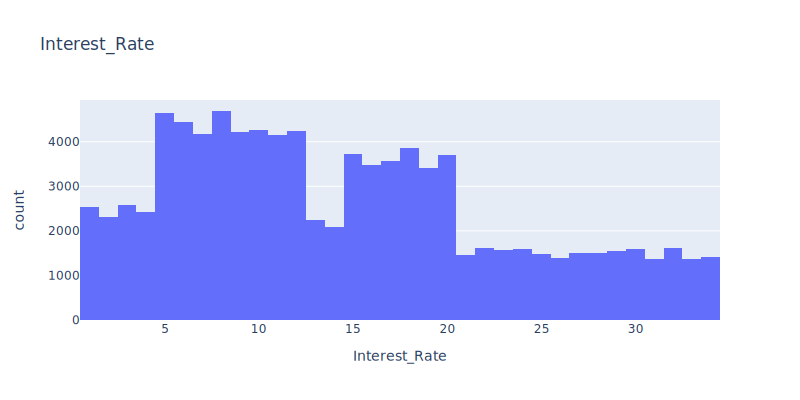

In [22]:
fig = px.histogram(train_df, x="Interest_Rate",title = "Interest_Rate",width=800, height=400)
fig.show()

Las tasas de interes van desde el 1% hasta 34%. Hay picos entre el 5% y el 10% y el 15% y el 20%.

### Delay_from_due_date

Tiene valores negativos que deben ser eliminados

In [23]:
train_df = train_df[(train_df.Delay_from_due_date >=0)]

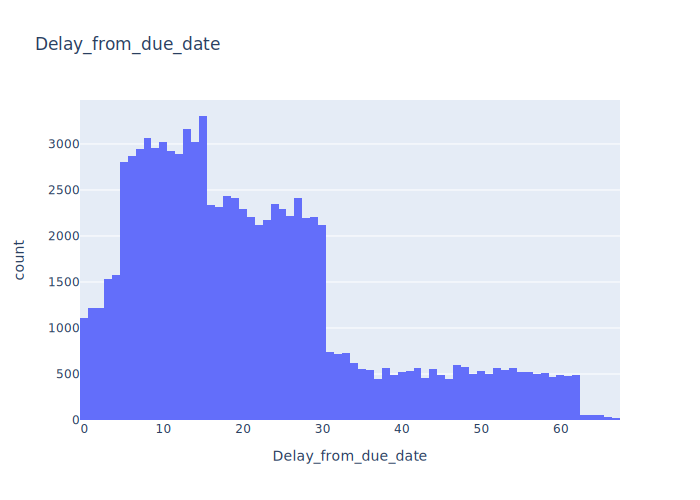

In [24]:
fig = px.histogram(train_df, x="Delay_from_due_date",title = "Delay_from_due_date")
fig.show()

La mayoria de personas tienen un delay para pagar de entre 5 y 30 días

### Num_Credit_Inquiries

Tiene valores muy grandes

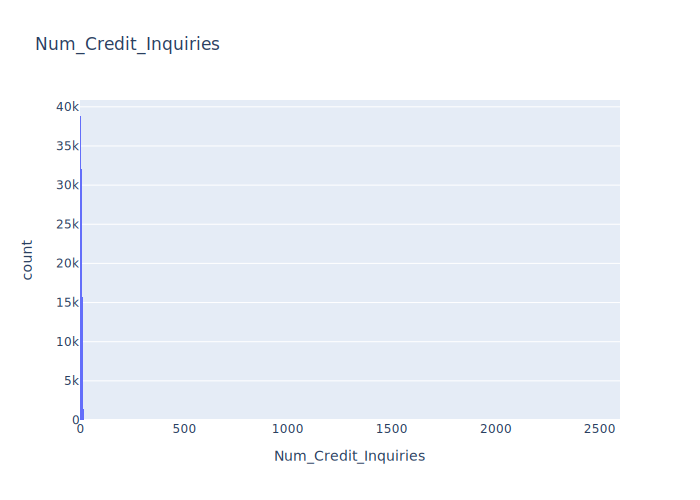

In [25]:
fig = px.histogram(train_df, x="Num_Credit_Inquiries",title = "Num_Credit_Inquiries")
fig.show()

Revisando el histograma se decide que se va a dejar hasta 20 credit inquiries ya que de los demas valores hay solo una observación y son muy elevados para el contexto de negocio

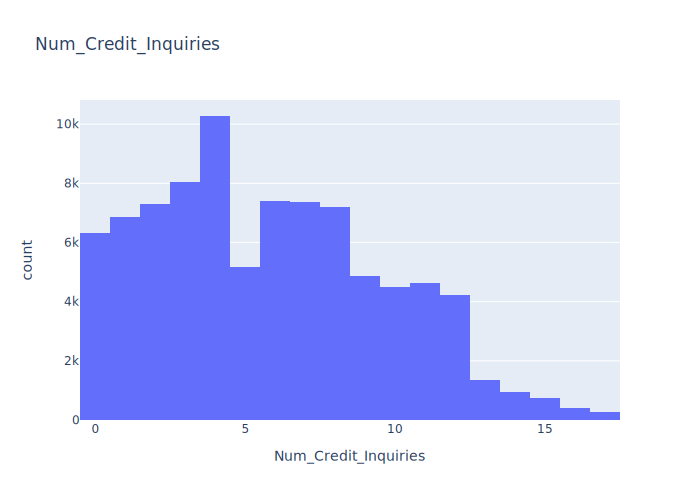

In [26]:
train_df = train_df[(train_df.Num_Credit_Inquiries >=0) & (train_df.Num_Credit_Inquiries <= 20)]
fig = px.histogram(train_df, x="Num_Credit_Inquiries",title = "Num_Credit_Inquiries")
fig.show()

a la mayoria de personas la consultan entre 0 y 12 veces

### Credit_utilization_ratio

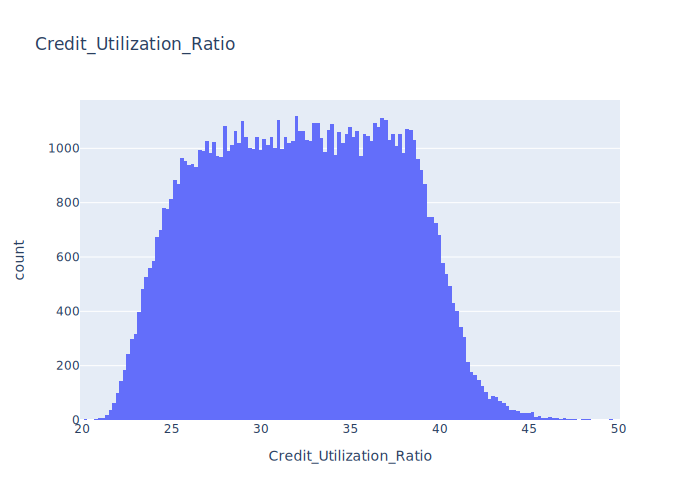

In [27]:
fig = px.histogram(train_df, x="Credit_Utilization_Ratio",title = "Credit_Utilization_Ratio	")
fig.show()

### Total_EMI_per_month

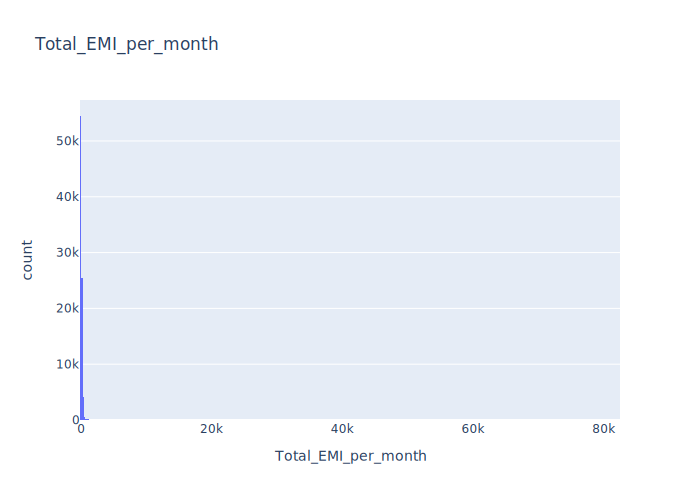

In [28]:
fig = px.histogram(train_df, x="Total_EMI_per_month",title = "Total_EMI_per_month")
fig.show()


También se debe hacer una limpieza ya que hay valores muy altos que no tienen sentido

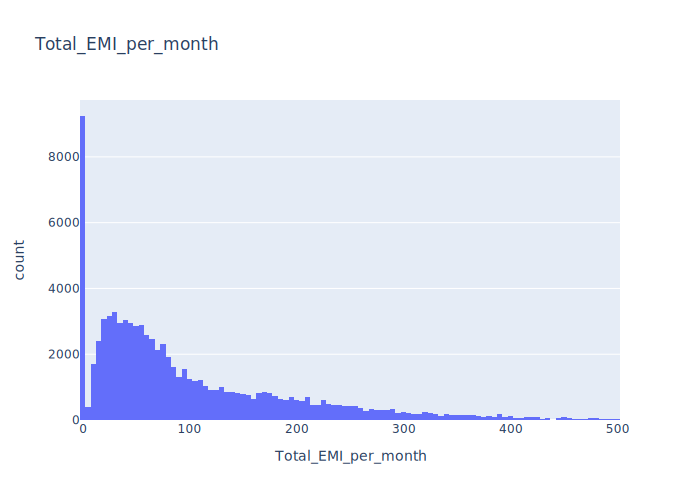

In [29]:
train_df = train_df[(train_df.Total_EMI_per_month >=0) & (train_df.Total_EMI_per_month <= 500)]
fig = px.histogram(train_df, x="Total_EMI_per_month",title = "Total_EMI_per_month")
fig.show()

### Annual Income
Sucede lo mismo que con la columna Age. Hay valores que están seguidos por un guión bajo (_) y valores que no tienen sentido en el contexto del negocio.

In [30]:
def limpieza_income(x):
    try:
        return float(x)
    except:
        return float(x.replace("_",""))

In [31]:
train_df.Annual_Income = train_df.Annual_Income.apply(limpieza_income)

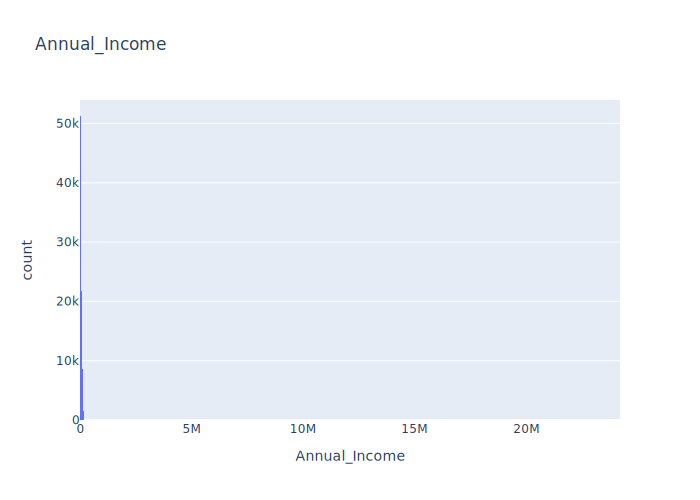

In [32]:
fig = px.histogram(train_df, x="Annual_Income",title = "Annual_Income")
fig.show()

Vemos que hay valores demasiado altos por lo que debemos hacer una limpieza

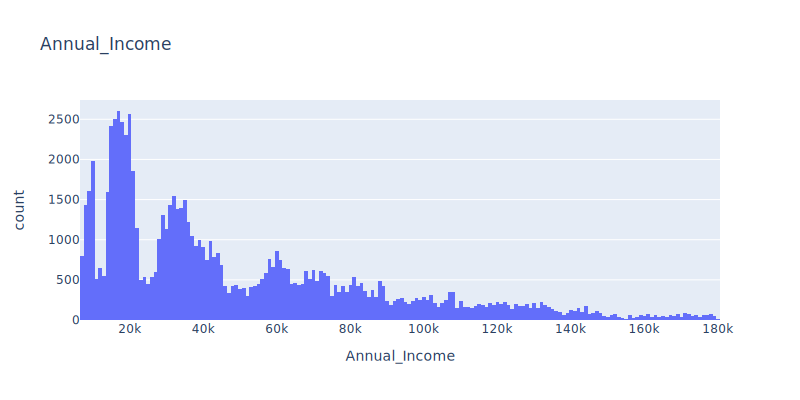

In [33]:
train_df = train_df[(train_df.Annual_Income >=0) & (train_df.Annual_Income <= 200000)]
fig = px.histogram(train_df, x="Annual_Income",title = "Annual_Income",width=800, height=400)
fig.show()

La mayoria de personas se encuentra en la cola izquierda. A medida que aumentan  los salarios son menos las personas que se encuentran en ese rango

### Num_of_Loan

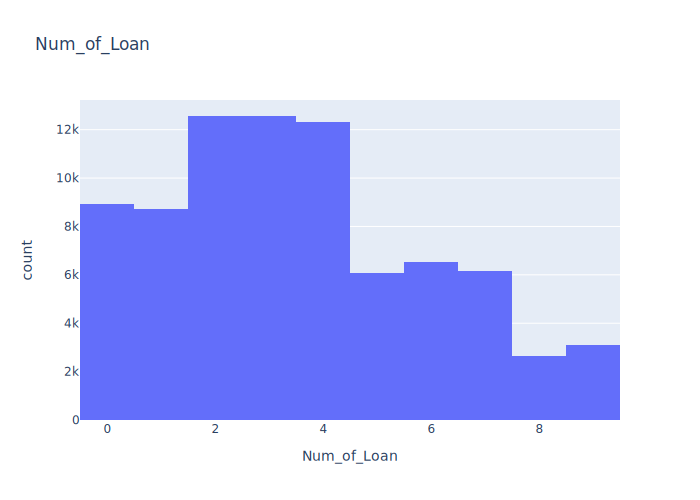

In [34]:
train_df.Num_of_Loan = train_df.Num_of_Loan.apply(limpieza_age)
train_df = train_df[(train_df.Num_of_Loan >=0) & (train_df.Num_of_Loan <= 10)]

fig = px.histogram(train_df, x="Num_of_Loan",title = "Num_of_Loan")
fig.show()

La mayoria de personas tienen entre 0 y 7 prestamos

### Num_of_Delayed_Payment

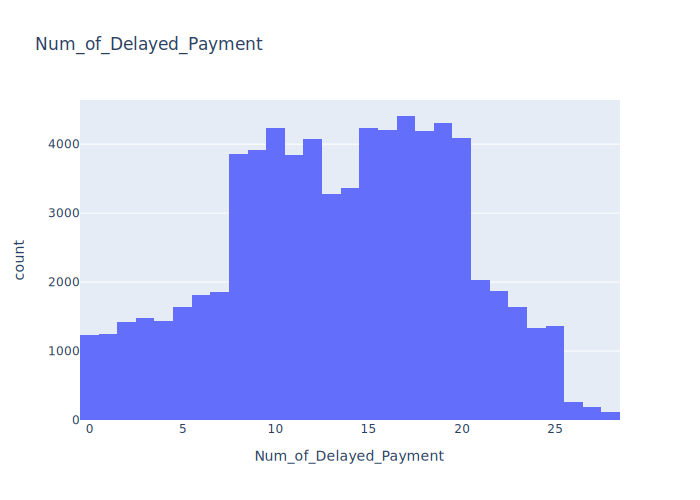

In [35]:
train_df.Num_of_Delayed_Payment = train_df.Num_of_Delayed_Payment.apply(limpieza_income)
train_df = train_df[(train_df.Num_of_Delayed_Payment >=0) & (train_df.Num_of_Delayed_Payment <= 29)]

fig = px.histogram(train_df, x="Num_of_Delayed_Payment",title = "Num_of_Delayed_Payment")
fig.show()

### Changed_Credit_Limit

También debemos cambiar el tipo de dato a float para poder visualizarlo correctamente

In [36]:
def limpieza_limite(x):
    try:
        return float(x)
    except:
        return

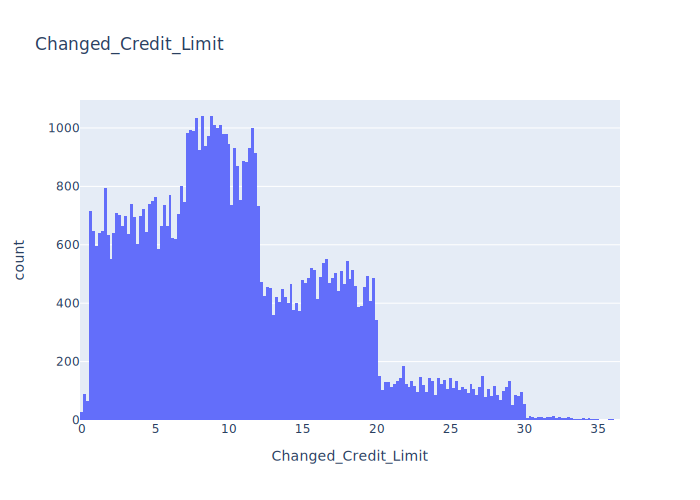

In [37]:
train_df.Changed_Credit_Limit = train_df.Changed_Credit_Limit.apply(limpieza_limite).dropna()
train_df = train_df[(train_df.Changed_Credit_Limit >=0)]

fig = px.histogram(train_df, x="Changed_Credit_Limit",title = "Changed_Credit_Limit")
fig.show()

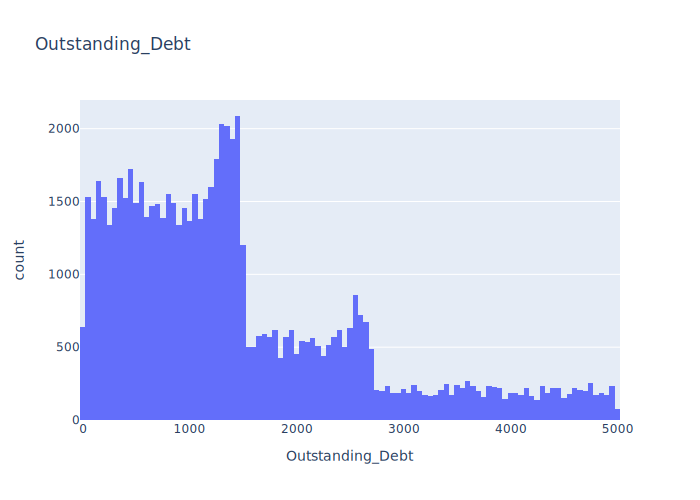

In [38]:
train_df.Outstanding_Debt = train_df.Outstanding_Debt.apply(limpieza_income)
fig = px.histogram(train_df, x="Outstanding_Debt",title = "Outstanding_Debt")
fig.show()

### Amount_invested_monthly

Se decide que para eliminar los outliers se van a tomar valores que esten por debajo de la media + 3 desviaciones estandar = 780.5650810000001

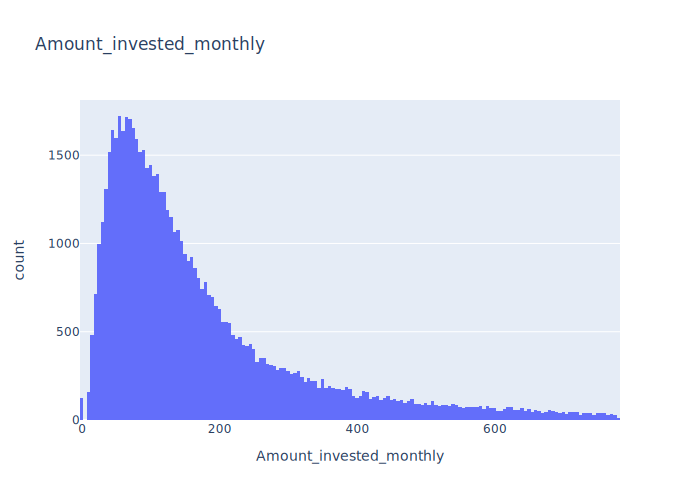

In [39]:
train_df.Amount_invested_monthly = train_df.Amount_invested_monthly.apply(limpieza_limite).dropna()
train_df = train_df[(train_df.Amount_invested_monthly >=0) & (train_df.Amount_invested_monthly <= 780.5650810000001)]

fig = px.histogram(train_df, x="Amount_invested_monthly",title = "Amount_invested_monthly")
fig.show()


La mayoria de cantidad invertida se encuentra en la cola  izquierda y disminuye a medida que aumenta la cantidad. Parece ser una distribución exponencial

### Monthly_Balance

Se decide que para eliminar los outliers se van a tomar valores que esten por debajo de la media + 2 desviaciones estandar = 821.143843

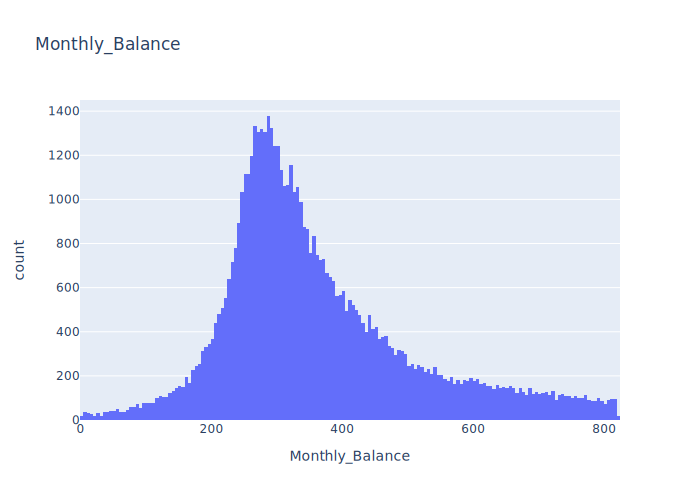

In [40]:
train_df.Monthly_Balance = train_df.Monthly_Balance.apply(limpieza_limite).dropna()
train_df = train_df[(train_df.Monthly_Balance >=0) & (train_df.Monthly_Balance <= 821.143843)]
fig = px.histogram(train_df, x="Monthly_Balance",title = "Monthly_Balance")
fig.show()

El monthly Balance parece estar centrado en la mitad por lo que puede ser una distribución normal

In [41]:
train_df.shape

(58484, 28)

## Variables Categoricas

### Occupation

Vemos que hay un valor que es "____" por lo que debe ser considerado como NA

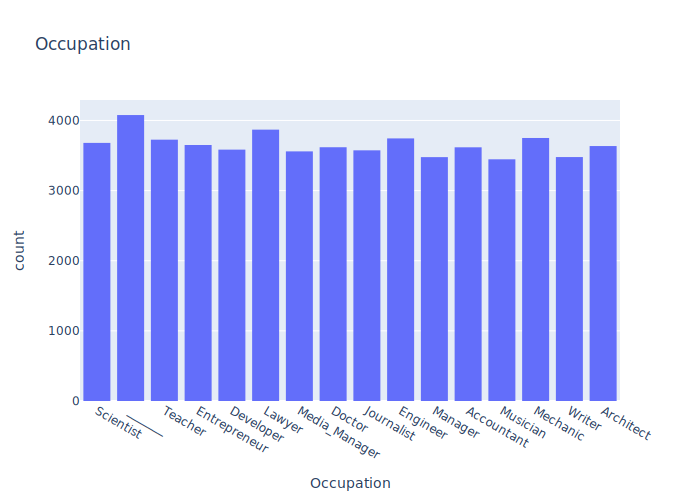

In [42]:
fig = px.histogram(train_df, x="Occupation",title = "Occupation")
fig.show()

Las profesiones están distribuidas equitativamente en el dataset
El ___ Es un valor faltante

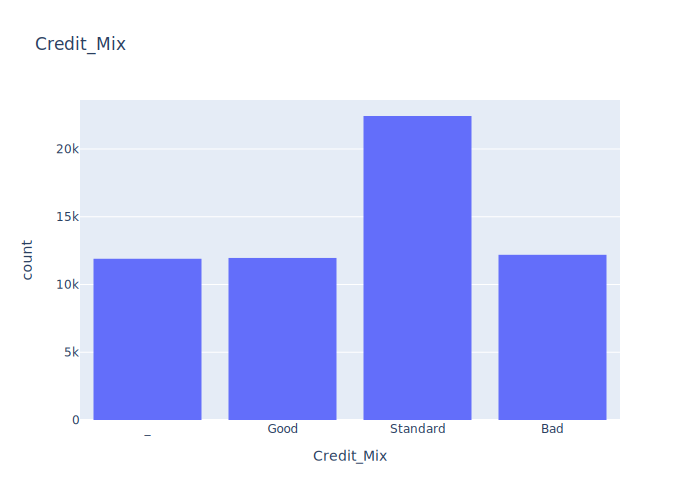

In [43]:

fig = px.histogram(train_df, x="Credit_Mix",title = "Credit_Mix")
fig.show()

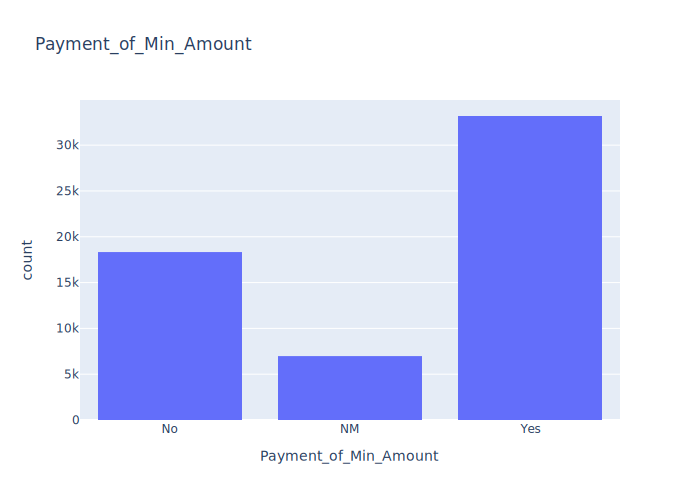

In [44]:

fig = px.histogram(train_df, x="Payment_of_Min_Amount",title = "Payment_of_Min_Amount")
fig.show()

Son más las personas que pagan la cantidad minima que las que no
El NM es un valor faltante

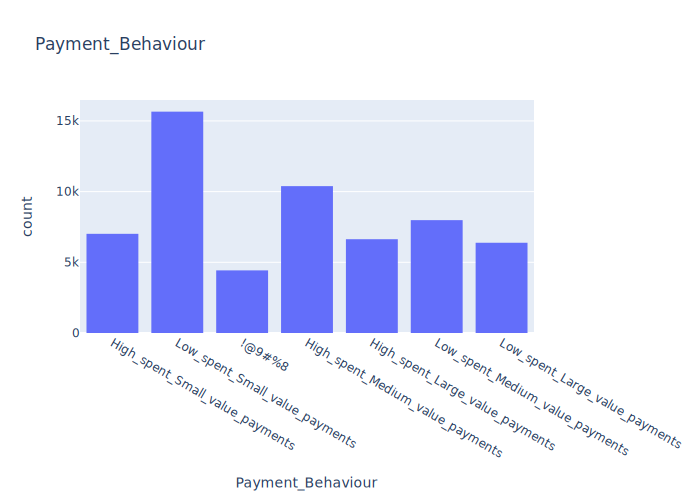

In [45]:
fig = px.histogram(train_df, x="Payment_Behaviour",title = "Payment_Behaviour")
fig.show()

La mayoria de personas tienen gastos bajos y pagan valores bajos del credito
El !@9#%8 es un valor faltante

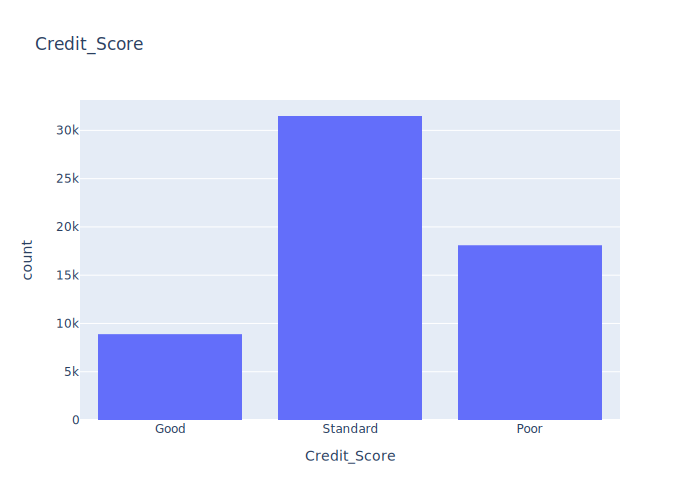

In [46]:

fig = px.histogram(train_df, x="Credit_Score",title = "Credit_Score")
fig.show()

La mayoria de personas en el dataset tienen un puntaje estandar seguido de un mal puntaje y por último un buen puntaje

Eliminamos los datos que no tienen sentido

In [47]:
train_df = train_df.mask(train_df == "NM")
train_df = train_df.mask(train_df == "!@9#%8")
train_df = train_df.mask(train_df == "_")
train_df = train_df.mask(train_df =='_______' )

En este caso decidimos eliminar todos los faltantes para que no haya ruido al probar las hipotesis. Sin embargo, a la hora de entrenar un modelo se debe buscar otra solución donde no se eliminen tantos datos

In [48]:
train_df = train_df.dropna()

## ¿Las personas con mejores salarios tienden a tener mejores perfiles crediticios? 

Primero miramos si existe alguna correlación entre las dos variables. El perfil crediticio no es númerico pero es ordinal por lo que podemos reemplazar los datos por un número dependiendo del orden y ver la correlacion.

In [49]:
def categorico(x):
    if x == "Poor":
        return 0
    if x == "Standard":
        return 1
    if x == "Good":
        return 2

In [50]:
df_corr = train_df[["Annual_Income","Credit_Score"]].copy()

In [51]:
df_corr.Credit_Score = df_corr.Credit_Score.apply(categorico)
df_corr.corr()

,Annual_Income,Credit_Score
Annual_Income,1.000000,0.152253
Credit_Score,0.152253,1.000000


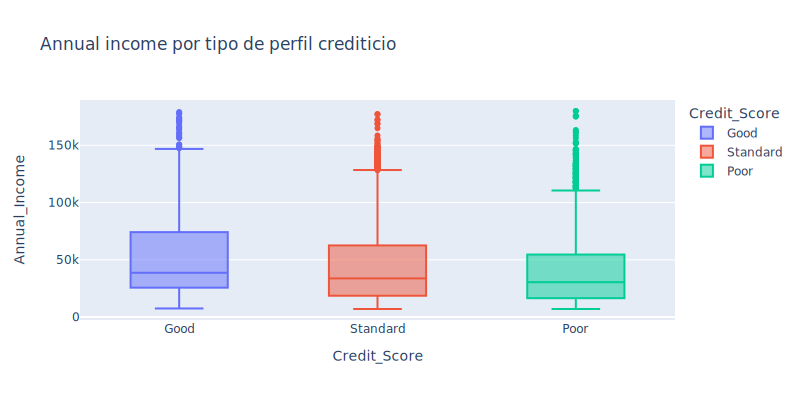

In [52]:
fig = px.box(train_df, y="Annual_Income",x = "Credit_Score",color= "Credit_Score",title = "Annual income por tipo de perfil crediticio",width=800, height=400)
fig.show()

### Al mirar la correlación, es muy baja por lo que pareciera que las personas con mejores salarios no tienen mejores perfiles crediticios. Mirando el Box Plot confirmamos esta hipotesis ya que como se puede ver en la grafica los salarios de las personas en cada uno de los posibles perfiles es muy similar y no se ve una diferencia significativa

## ¿Se puede categorizar a un cliente en algún perfil crediticio por su rango de edad?

Realizamos el mismo procedimiento que en el punto anterior

In [53]:
df_corr = train_df[["Age","Credit_Score"]].copy()
df_corr.Credit_Score = df_corr.Credit_Score.apply(categorico)
df_corr.corr()

,Age,Credit_Score
Age,1.000000,0.157968
Credit_Score,0.157968,1.000000


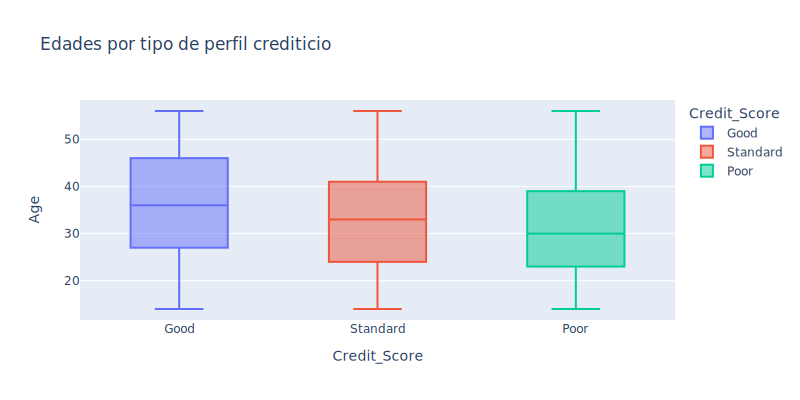

In [54]:
fig = px.box(train_df, y="Age",x = "Credit_Score",color= "Credit_Score",title = "Edades por tipo de perfil crediticio",width=800, height=400)
fig.show()

### Al mirar la correlación, es muy baja por lo que pareciera que la edad de las peronas no influye en su perfil crediticio. Mirando el Box Plot confirmamos esta hipotesis ya que como se puede ver en la grafica las edades de las personas en cada uno de los posibles perfiles es muy similar y no se ve una diferencia significativa

## ¿Hay profesiones que suelen tener el máximo perfil crediticio (Bueno)?

In [55]:
good_df = train_df[train_df.Credit_Score == "Good"]

In [56]:
figura = good_df.Occupation.value_counts().to_frame().reset_index()

In [57]:
figura

,index,Occupation
0,Teacher,246
1,Architect,232
2,Accountant,227
3,Lawyer,222
4,Journalist,214
5,Musician,213
6,Manager,208
7,Entrepreneur,206
8,Developer,205
9,Engineer,202


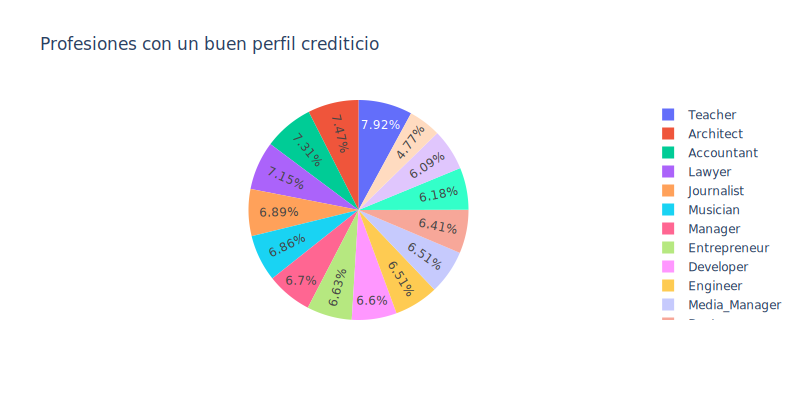

In [58]:
fig = px.pie(figura, values='Occupation', names='index', title='Profesiones con un buen perfil crediticio',width=800, height=400)
fig.show()

Podemos ver que todas las profesiones están distribuidas casi de la misma forma por lo que pareciera que la ocupación no influye para que el perfil crediticio sea bueno. Es posible que para las otras dos categorías si influya (poor, standard)

## ¿Es posible que las personas sean catalogadas en peores perfiles crediticios en meses específicos del año? Para resolver esta pregunta calcularemos la cantidad de personas catalogas por perfil en cada mes, ejemplo:

In [59]:
grafica = train_df.groupby(["Month","Credit_Score"]).size().to_frame()
grafica = grafica.reset_index()
grafica.columns = ["Month","Credit_Score","Count"]

In [60]:
grafica

,Month,Credit_Score,Count
0,April,Good,413
1,April,Poor,904
2,April,Standard,1439
3,August,Good,405
4,August,Poor,916
5,August,Standard,1457
6,February,Good,350
7,February,Poor,899
8,February,Standard,1534
9,January,Good,353


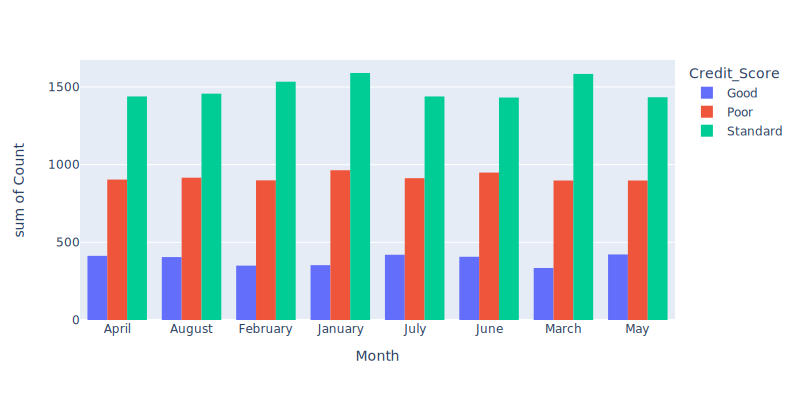

In [61]:
fig = px.histogram(grafica, x="Month", y="Count",
             color='Credit_Score', barmode='group',
             width=800, height=400)
fig.show()

El mes no influye en el número de personas clasificadas en cada una de las categorias

### ¿Recibir mayores tasas de interés conlleva a que los clientes tengan peores perfiles crediticios?

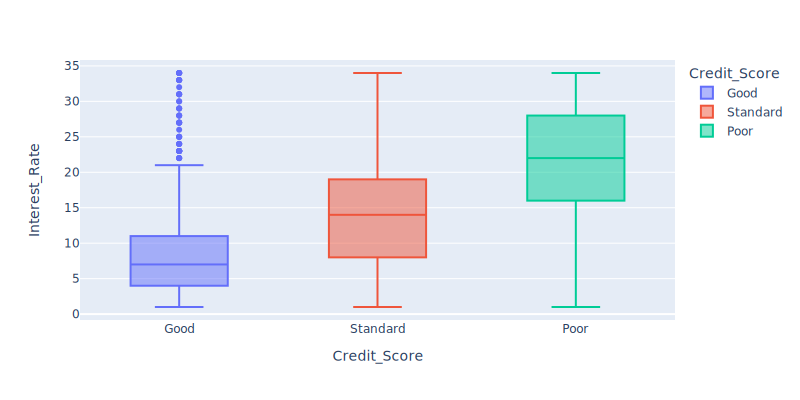

In [62]:
fig = px.box(train_df, y="Interest_Rate",x = "Credit_Score",color= "Credit_Score", width=800, height=400)
fig.show()

Viendo la gráfica podemos confirmar que las tasas de interés de las personas con un buen perfil son más bajas seguidas por las Standard y por último los que tienen un mal perfil crediticio tienen las tasas más altas

### ¿Entre menor el número de tarjetas de crédito mejor el perfil crediticio?

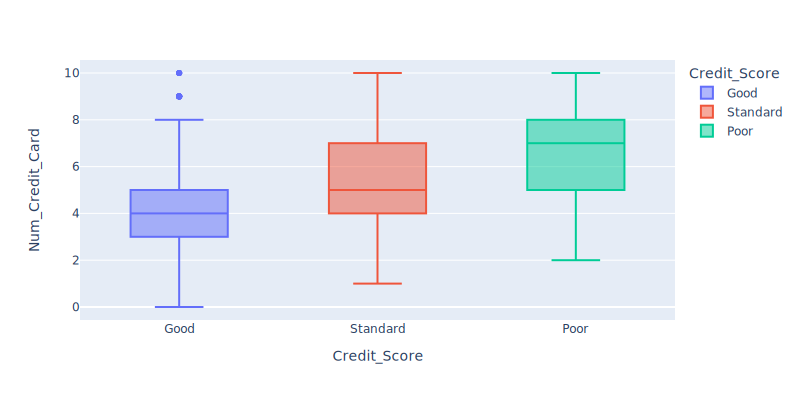

In [63]:
fig = px.box(train_df, y="Num_Credit_Card",x = "Credit_Score",color= "Credit_Score",width=800, height=400)
fig.show()

Confirmamos que las personas con buen perfil crediticio tienden a tener menos tarjetas de credito que los demas perfiles